# Evaluación del Curso

La evaluación de los conocimientos impartidos durante las clases será a modo de entrega de trabajo práctico final. La entrega de trabajo final de la cursada comprende una investigación, desarrollo y resultados finales basados en un set de datos a elección por el grupo (máximo 6 personas).

## Criterios de Aprobación

Los criterios de aprobación son los siguientes:

1. **Trabajo en Grupo:** 
   - Obligación de trabajar en grupo mínimo de 2 y máximo de 6 personas.
   - Excepciones se pueden hacer mediante un correcto justificativo.

2. **Fuentes de Información:**
   - Cada TP debe citar la fuente de información de evaluación.
   - Se debe especificar de dónde se obtuvieron los datos.

3. **Formato de Entrega:**
   - Preferentemente en notebook de iPython (formato `.ipynb`).
   - También se acepta entrega mediante un documento en Google Colab.

4. **Propuesta de Investigación:**
   - Contendrá la propuesta de investigación en los datos.
   - Citar el porqué de la evaluación.
   - Explicar qué se pretende encontrar o descubrir con dicha investigación.

5. **Selección del Algoritmo:**
   - Explicar el porqué de la elección del algoritmo empleado.
   - Justificar cómo se llegó a esa elección por sobre otras opciones.

6. **Resultados y Métricas:**
   - Expresar de manera clara el resultado de la investigación.
   - Aportar las métricas necesarias para comprender el desempeño del algoritmo elegido.

7. **Reproducibilidad:**
   - El entregable debe incluir el código acompañado para su reproducibilidad.

8. **Reflexión y Propuestas Futuras:**
   - En su cierre, debe dar una reflexión de la investigación.
   - Proponer nuevos caminos de resolución en caso de ser necesario.

---

*Nota: Este documento sirve como guía para la evaluación final del curso. Asegúrate de cumplir con todos los criterios mencionados para maximizar tus posibilidades de aprobación.*

# Importar Librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Analisis breve de los distintos datasets

In [3]:
car_data = pd.read_csv('../datasets/car data.csv')
car_details = pd.read_csv('../datasets/CAR DETAILS FROM CAR DEKHO.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../datasets/car data.csv'

In [3]:
car_data.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
49,ciaz,2017,7.75,9.29,37000,Petrol,Dealer,Automatic,0
262,amaze,2015,4.00,5.80,40023,Petrol,Dealer,Manual,0
141,Bajaj Avenger 150 street,2016,0.60,0.80,20000,Petrol,Individual,Manual,0
41,alto k10,2014,2.55,3.98,46706,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Vemos que no tenemos datos nulos!

In [5]:
car_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [6]:
car_details2  = pd.read_csv('../datasets/Car details v4.csv')

In [4]:
car_details4  = pd.read_csv('../datasets/Car details v3.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../datasets/Car details v3.csv'

In [5]:
car_details2  

NameError: name 'car_details2' is not defined

In [6]:
car_details4

NameError: name 'car_details4' is not defined

In [7]:
car_details

NameError: name 'car_details' is not defined

yo creo que lo mejor es ir con car details v3 es el que mas datos tiene y tiene una buena cantidad de columnas, hasta podriamos de ver de concatener v4 sacando columnas

# Analisis exploratorio de datos

In [11]:
data = car_details4.copy()

In [12]:
data.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,8128.0,2013.804011,4.044249,1983.0,2011.0,2015.0,2017.0,2020.0
selling_price,8128.0,638271.807702,806253.403508,29999.0,254999.0,450000.0,675000.0,10000000.0
km_driven,8128.0,69819.510827,56550.554958,1.0,35000.0,60000.0,98000.0,2360457.0
seats,7907.0,5.416719,0.959588,2.0,5.0,5.0,5.0,14.0


vemos que tenemos datos nulos veamos porque son datos si se olvidaron de anotar el dato o es por otra causa.

In [15]:
filas_seats_null = data[data['seats'].isnull()]

filas_seats_null.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
138,BMW X1 sDrive 20D xLine,2017,2150000,27000,Diesel,Dealer,Automatic,First Owner,NaN,NaN,NaN,NaN,NaN
200,Toyota Etios GD,2012,235000,120000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
206,Maruti Omni E 8 Str STD,2003,40000,90000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
228,Maruti Swift 1.3 VXi,2008,130000,120000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
252,Tata Indica DLS,2005,75000,110000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN


In [16]:
filas_mileage_null = data[data['mileage'].isnull()]

filas_mileage_null.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
4542,Maruti Omni LPG STD BSIV,1999,70000,100000,LPG,Individual,Manual,Fourth & Above Owner,NaN,NaN,NaN,NaN,NaN
5104,Hyundai Santro Xing XG AT eRLX Euro II,2004,80000,90000,Petrol,Individual,Automatic,Second Owner,NaN,NaN,NaN,NaN,NaN
8009,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
1785,Maruti Swift 1.3 VXi,2007,150000,70000,Petrol,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,NaN
2356,Maruti Swift VDI BSIV,2011,295000,50000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
4571,Toyota Etios GD,2012,400000,158500,Diesel,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,NaN
3173,Maruti Swift VDI BSIV,2017,525000,38000,Diesel,Dealer,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
2386,Fiat Punto 1.3 Emotion,2010,190000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
5583,Mahindra Bolero LX,2005,350000,15000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
336,Hyundai Santro Xing XL,2005,85000,60000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN


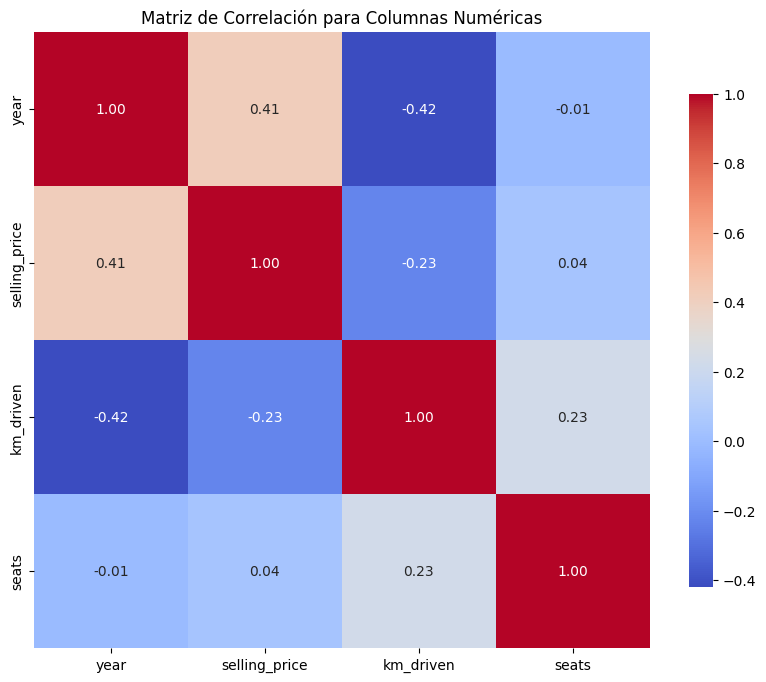

In [17]:
numerical_data = data.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = numerical_data.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Añadir título
plt.title('Matriz de Correlación para Columnas Numéricas')

# Mostrar el gráfico
plt.show()

In [18]:
filtered_data = data[(data['name'] == 'Maruti Swift Dzire VDI') & (data['year'] == 2012)]

filtered_data


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
260,Maruti Swift Dzire VDI,2012,360000,158000,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
946,Maruti Swift Dzire VDI,2012,415000,108000,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
7878,Maruti Swift Dzire VDI,2012,370000,68000,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0


como podemos ver para mi mismo auto y year comparten estas carecteristicas mileage	engine	max_power	torque	seats por lo que podriamos evaluar no usarlas para nuestro momento ya que sabiendo el modelo y year del auto tendriamos esa info.

## Analisis univariable

## Analisis multivariable

# Preprocesamiento de datos

## tratamiento de datos

In [8]:
data  = pd.read_csv('../../Car details v3.csv')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [10]:
numerical_cols = ['year', 'selling_price', 'km_driven']  # Otras columnas numéricas relevantes
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']  # Columnas categóricas

## Tratamiento de datos nulos

In [11]:
data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [12]:
def impute_nulls_with_similar(df):
    # Asegurarse de que 'name' y 'year' no tengan valores nulos
    df['name'] = df['name'].fillna('Unknown')
    df['year'] = df['year'].fillna(df['year'].mode()[0])
    
    # Columnas a imputar
    columns_to_impute = ['mileage', 'engine', 'max_power', 'torque', 'seats']
    
    for column in columns_to_impute:
        # Iterar sobre las filas con valores nulos en la columna actual
        for idx, row in df[df[column].isnull()].iterrows():
            # Buscar vehículos similares (mismo nombre y año)
            similar_vehicles = df[(df['name'] == row['name']) & 
                                  (df['year'] == row['year']) & 
                                  (df[column].notnull())]
            
            if not similar_vehicles.empty:
                # Si se encuentran vehículos similares, usar el valor más cercano
                df.at[idx, column] = similar_vehicles[column].iloc[0]
            else:
                # Si no se encuentran vehículos similares, usar la moda de la columna
                df.at[idx, column] = df[column].mode()[0]
    
    return df

In [13]:
data = impute_nulls_with_similar(data)

In [14]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

## Feature engineer

## Feature transformations

Lo primero que vamos a hacer es transformar las variables categoricas aca tenemos dos opciones generalmente One-hot-encoding y Label encoding 
One-Hot-Encoding esta técnica es adecuada cuando tienes variables categóricas con pocas categorías.
Label Encoding es util cuando tenemos una gran cantidad de categorías o si las categorías tienen un orden implícito.

In [15]:
print(data['fuel'].unique())
fuel_price_relation = data.groupby('fuel')['selling_price'].mean().reset_index()

print(fuel_price_relation)

['Diesel' 'Petrol' 'LPG' 'CNG']
     fuel  selling_price
0     CNG  301017.491228
1  Diesel  791452.921627
2     LPG  200421.052632
3  Petrol  462441.061691


aclaracion podriamos hacer un analisis ANOVA para ver si tienen relacion con el precio y darles un orden yo lo voy a dejar sin orden, pero si lo ven necesario podemos darle un orden.

In [16]:
print(data['seller_type'].unique())
seller_type_price_relation = data.groupby('seller_type')['selling_price'].mean().reset_index()

print(seller_type_price_relation)

['Individual' 'Dealer' 'Trustmark Dealer']
        seller_type  selling_price
0            Dealer   1.443494e+06
1        Individual   4.985612e+05
2  Trustmark Dealer   8.018390e+05


In [17]:
print(data['transmission'].unique())
transmission_price_relation = data.groupby('transmission')['selling_price'].mean().reset_index()

print(transmission_price_relation)

['Manual' 'Automatic']
  transmission  selling_price
0    Automatic   1.870828e+06
1       Manual   4.554259e+05


In [18]:
print(data['owner'].unique())
owner_price_relation = data.groupby('owner')['selling_price'].mean().reset_index()

print(owner_price_relation)

['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']
                  owner  selling_price
0           First Owner   7.830864e+05
1  Fourth & Above Owner   2.258132e+05
2          Second Owner   3.929645e+05
3        Test Drive Car   4.403800e+06
4           Third Owner   2.840153e+05


Dado que nuestras variables categoricas tienen pocas opciones para tomar y no hay un orden claro vamos a aplicar one-hot-encoding para las variables categoricas y standarScaler para las variables numericas.

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Escala las variables numéricas
        ('cat', OneHotEncoder(drop='first'), categorical_cols)  # Codifica las categóricas con OneHotEncoding
    ]
)

In [21]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])


In [22]:
X_preprocessed = pipeline.fit_transform(data)
print(X_preprocessed)

[[ 0.04846419 -0.2335288   1.33836255 ...  0.          0.
   0.        ]
 [ 0.04846419 -0.33275929  0.88741086 ...  1.          0.
   0.        ]
 [-1.9297752  -0.5957201   1.24109846 ...  0.          0.
   1.        ]
 ...
 [-1.18793543 -0.31787472  0.88741086 ...  0.          0.
   0.        ]
 [-0.19881574 -0.43198978 -0.79260528 ...  0.          0.
   0.        ]
 [-0.19881574 -0.43198978 -0.79260528 ...  0.          0.
   0.        ]]


In [24]:
X_preprocessed.shape

(8128, 13)

## Detencion de outliers

Para detectar outliers, se pueden utilizar técnicas univariables como los box plots, que son útiles cuando se analiza una sola variable. Sin embargo, en escenarios más complejos, donde las relaciones entre múltiples variables son importantes, es recomendable emplear técnicas más avanzadas y multivariables, como DBSCAN o Isolation Forest. Estas permiten identificar outliers de manera más efectiva al considerar el comportamiento conjunto de varias características, ofreciendo una visión más integral del conjunto de datos.

In [66]:
# 1. Función para aplicar DBSCAN con diferentes parámetros
def apply_dbscan(X, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    return labels

# 2. Función para visualizar resultados (outliers vs. no outliers)
def plot_clusters(X_2d, labels, title):
    plt.figure(figsize=(12, 8))
    is_outlier = labels == -1
    plt.scatter(X_2d[~is_outlier, 0], X_2d[~is_outlier, 1], c='blue', label='Clusters', alpha=0.6)
    plt.scatter(X_2d[is_outlier, 0], X_2d[is_outlier, 1], c='red', label='Outliers', alpha=0.6)
    plt.title(title)
    plt.legend()
    
    # Añadir información sobre la proporción de outliers
    n_outliers = np.sum(is_outlier)
    outlier_percentage = (n_outliers / len(labels)) * 100
    plt.annotate(f'Outliers: {n_outliers} ({outlier_percentage:.2f}%)', 
                 xy=(0.05, 0.95), xycoords='axes fraction',
                 fontsize=10, ha='left', va='top')
    
    plt.show()


# 4. Probar diferentes parámetros de DBSCAN
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [5, 10, 15]

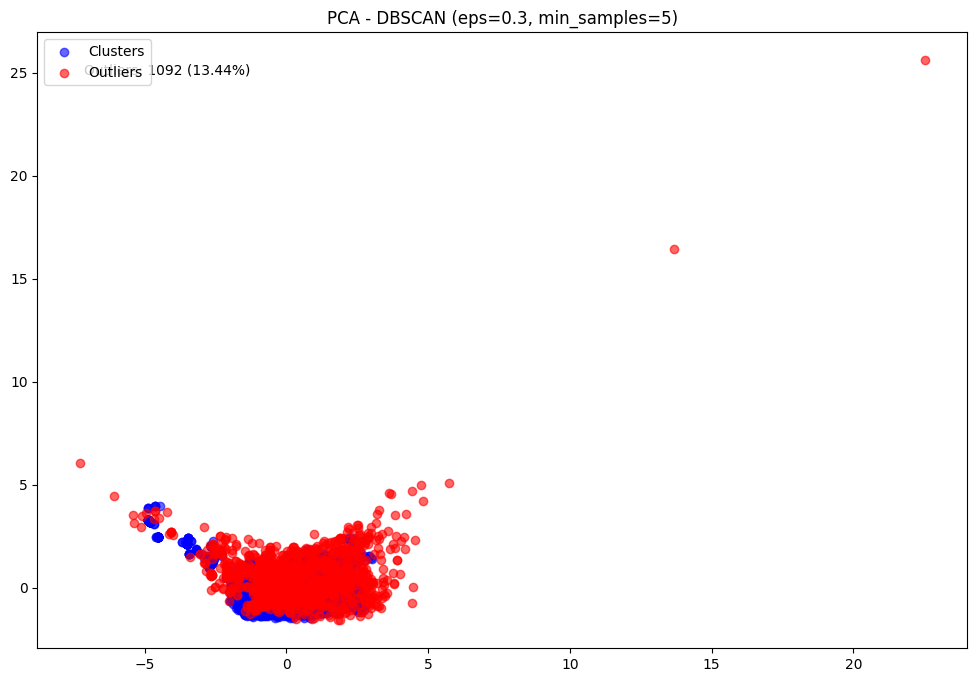

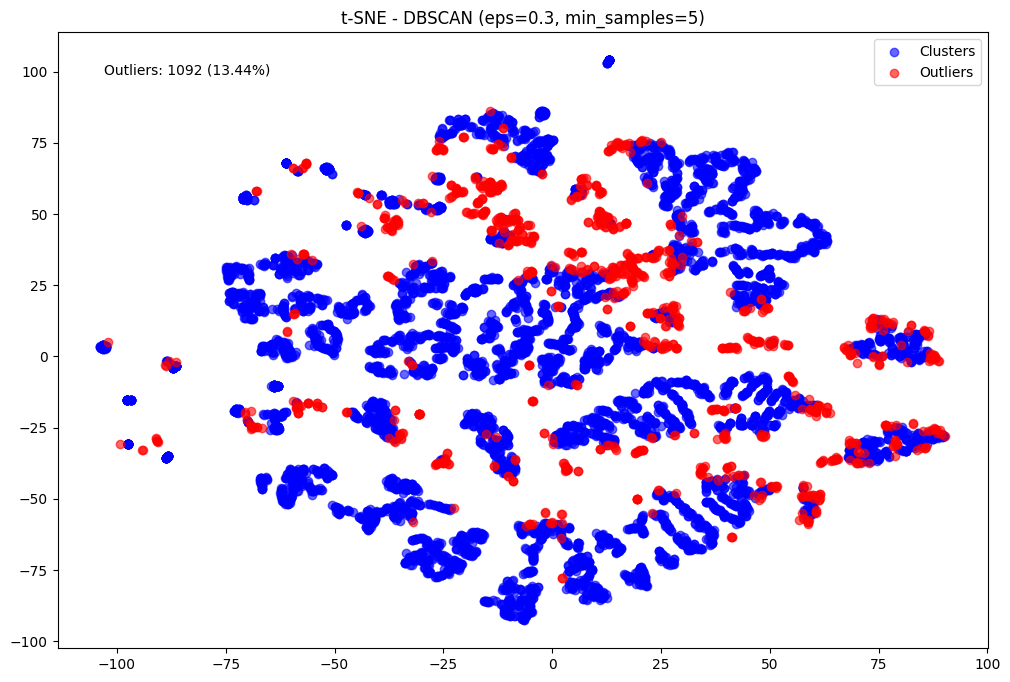

eps=0.3, min_samples=5:
  Número de clusters: 58
  Número de outliers: 1092 (13.44%)



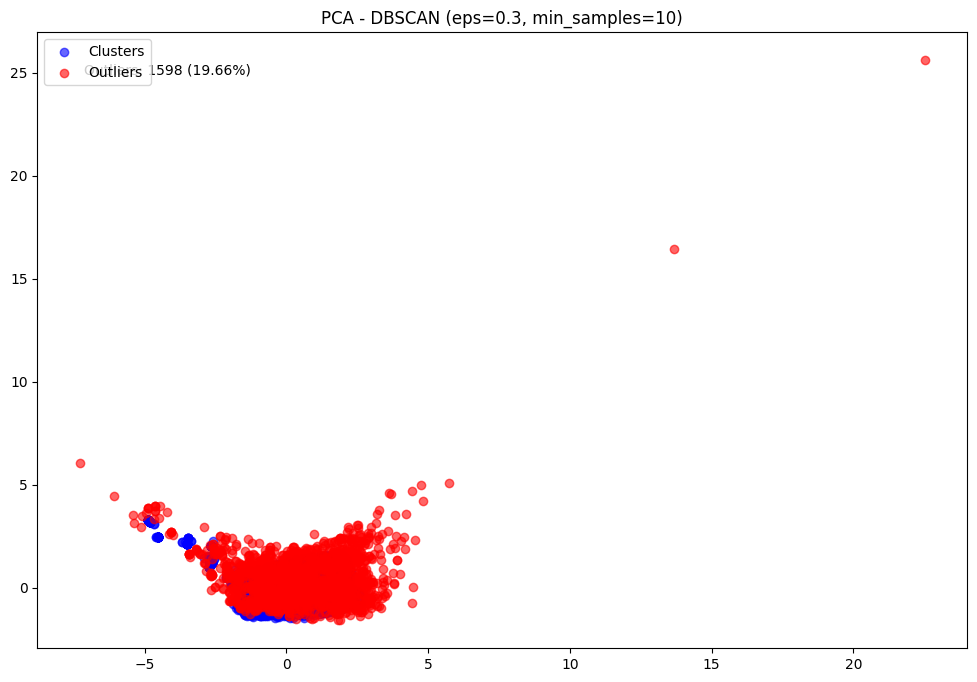

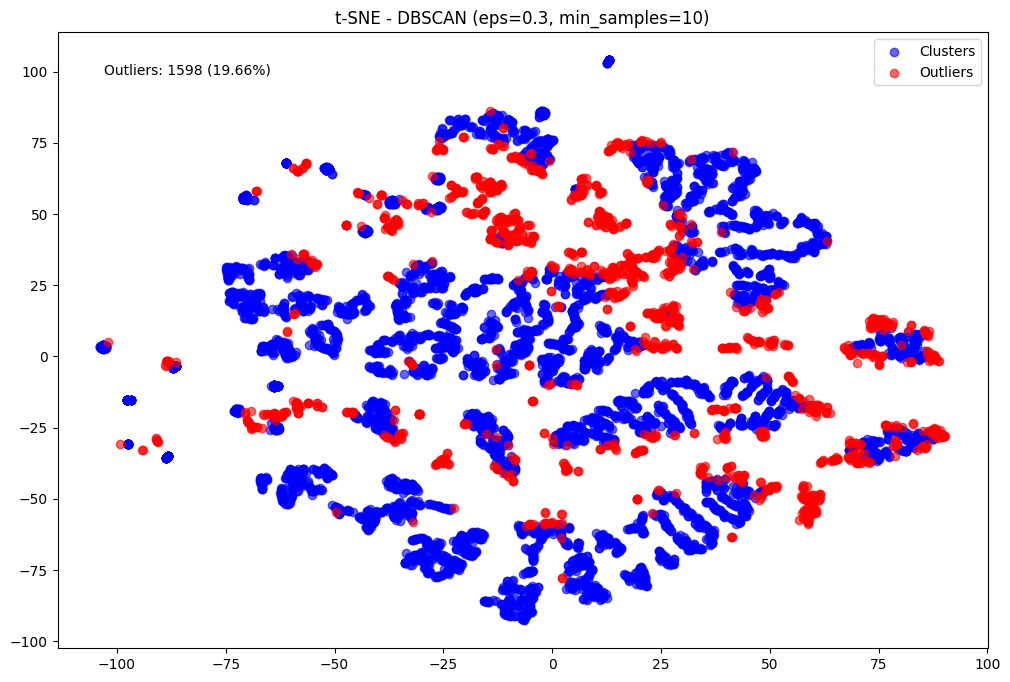

eps=0.3, min_samples=10:
  Número de clusters: 30
  Número de outliers: 1598 (19.66%)



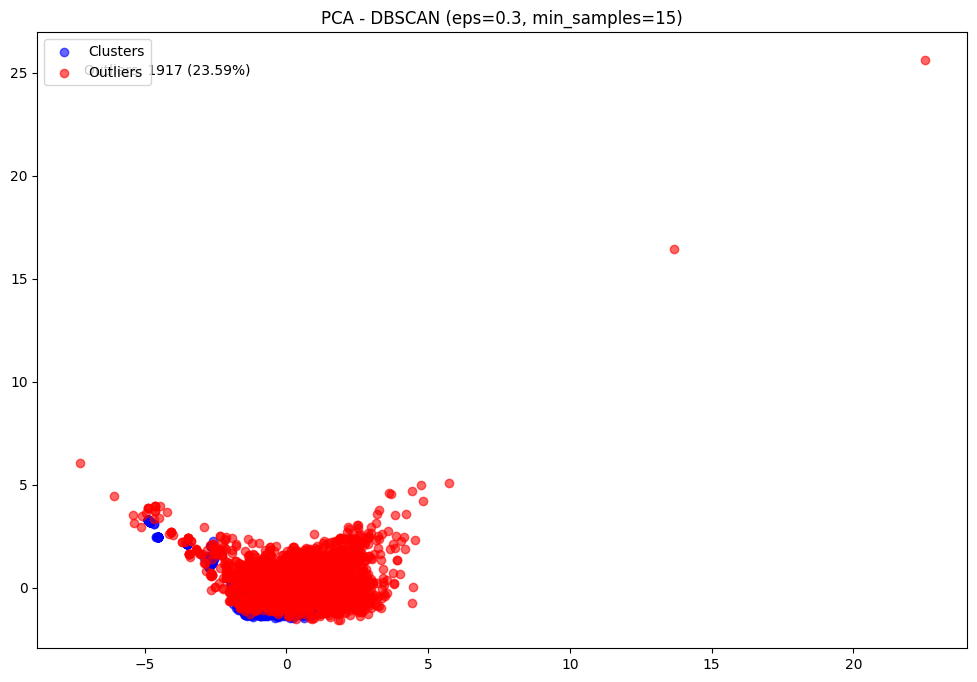

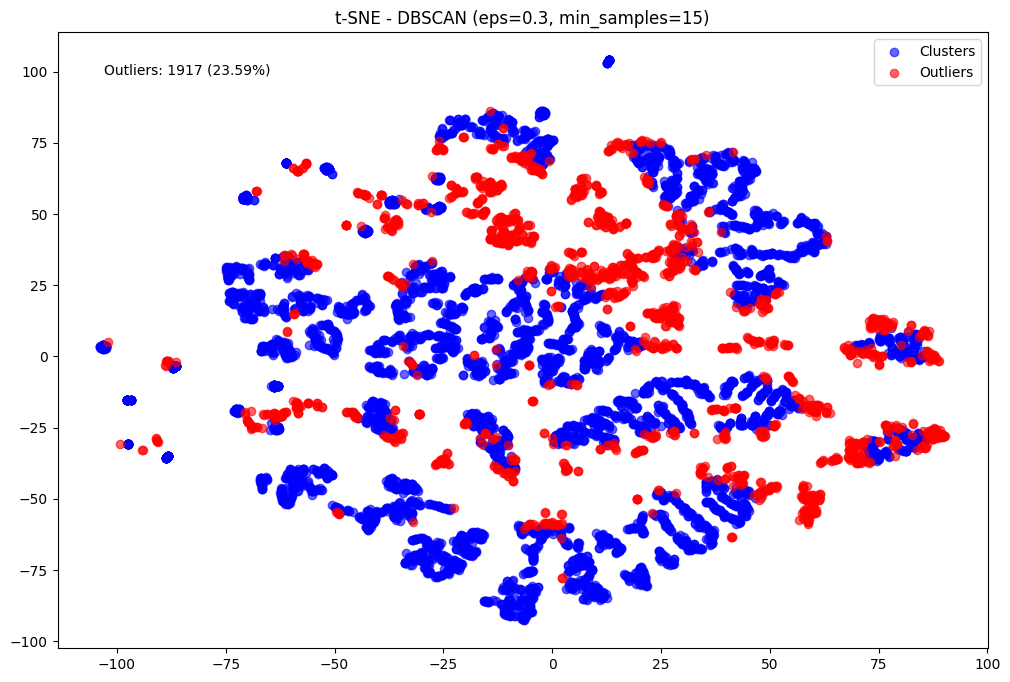

eps=0.3, min_samples=15:
  Número de clusters: 25
  Número de outliers: 1917 (23.59%)



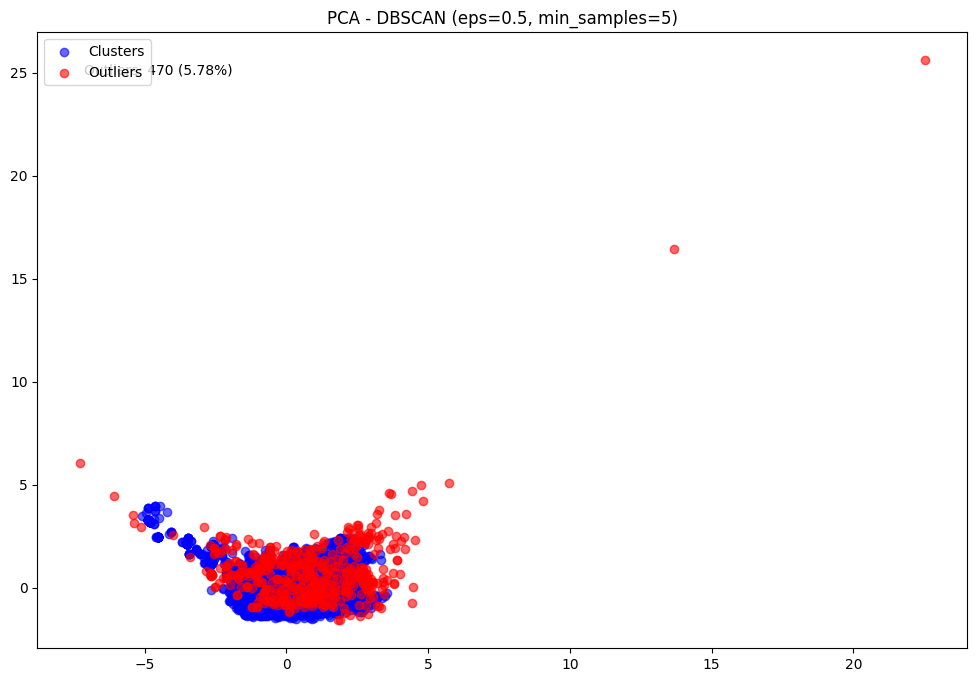

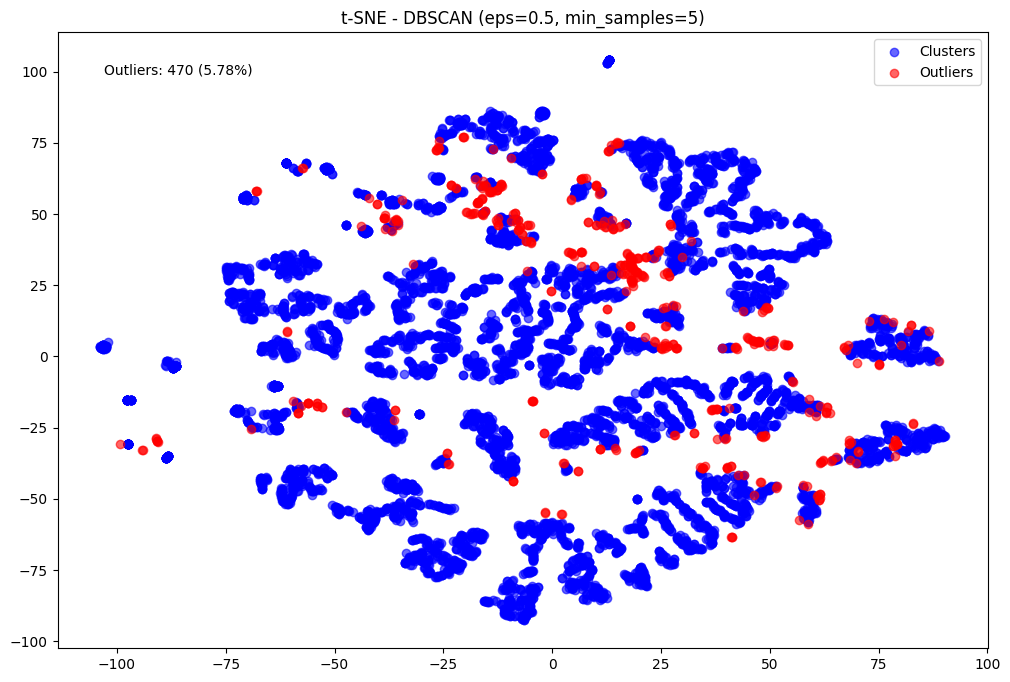

eps=0.5, min_samples=5:
  Número de clusters: 56
  Número de outliers: 470 (5.78%)



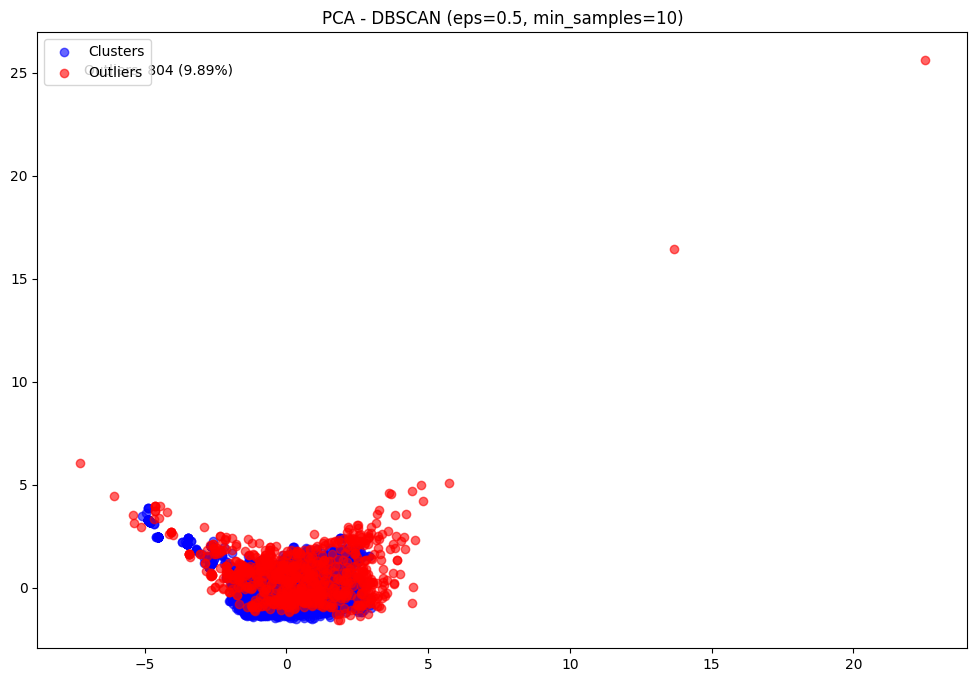

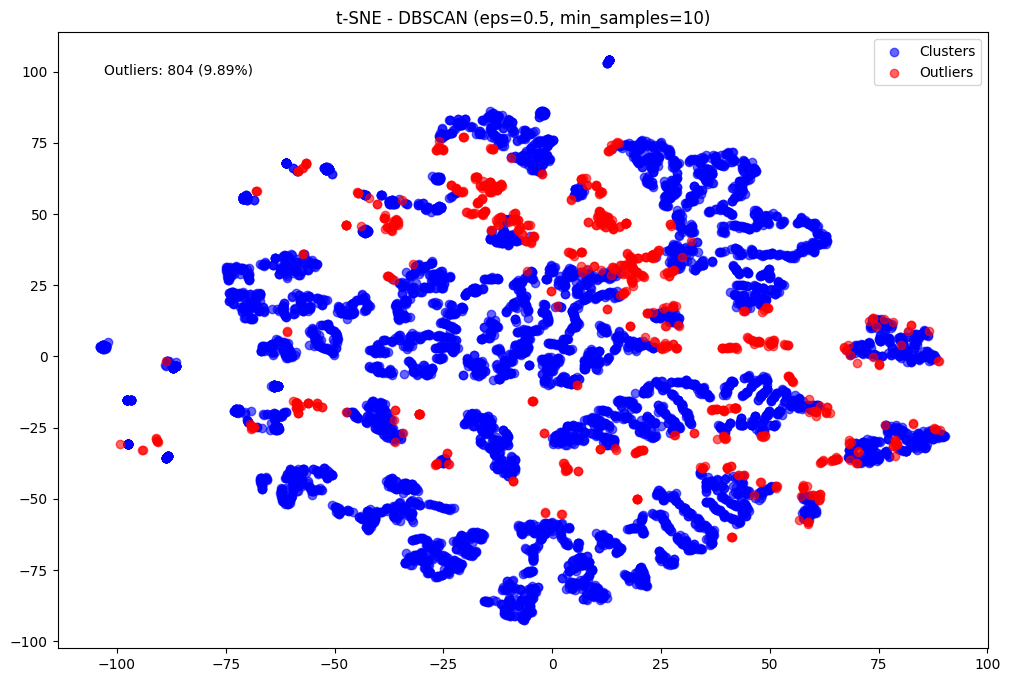

eps=0.5, min_samples=10:
  Número de clusters: 27
  Número de outliers: 804 (9.89%)



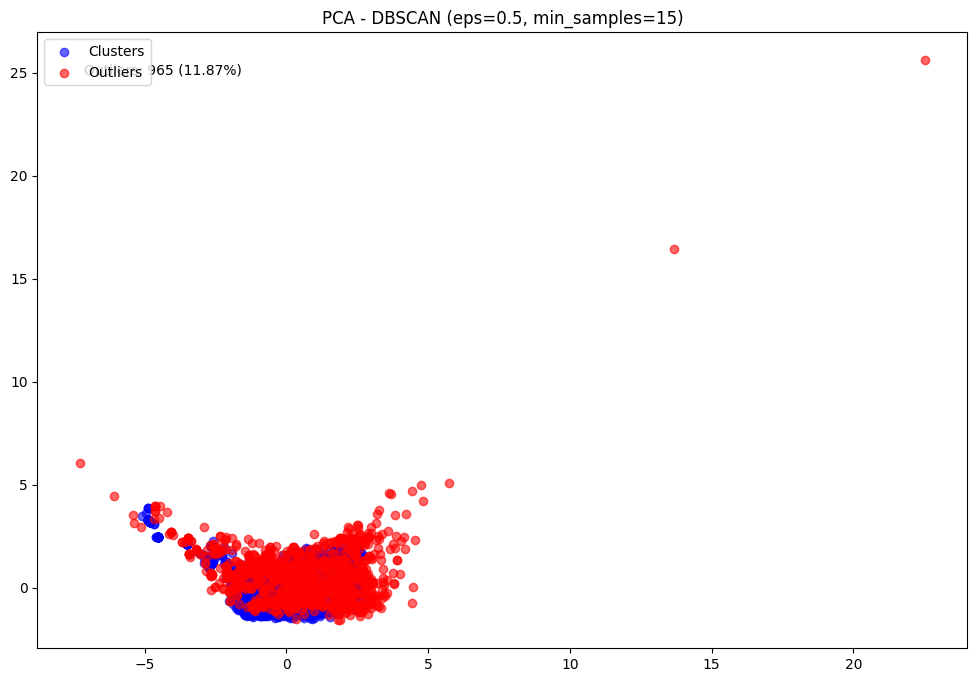

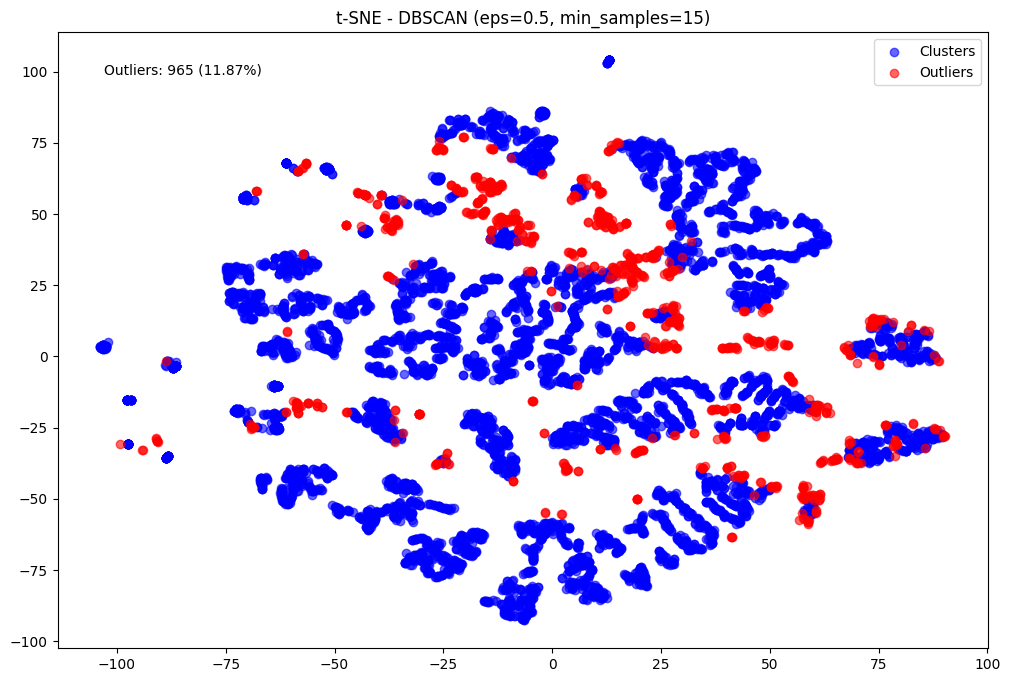

eps=0.5, min_samples=15:
  Número de clusters: 25
  Número de outliers: 965 (11.87%)



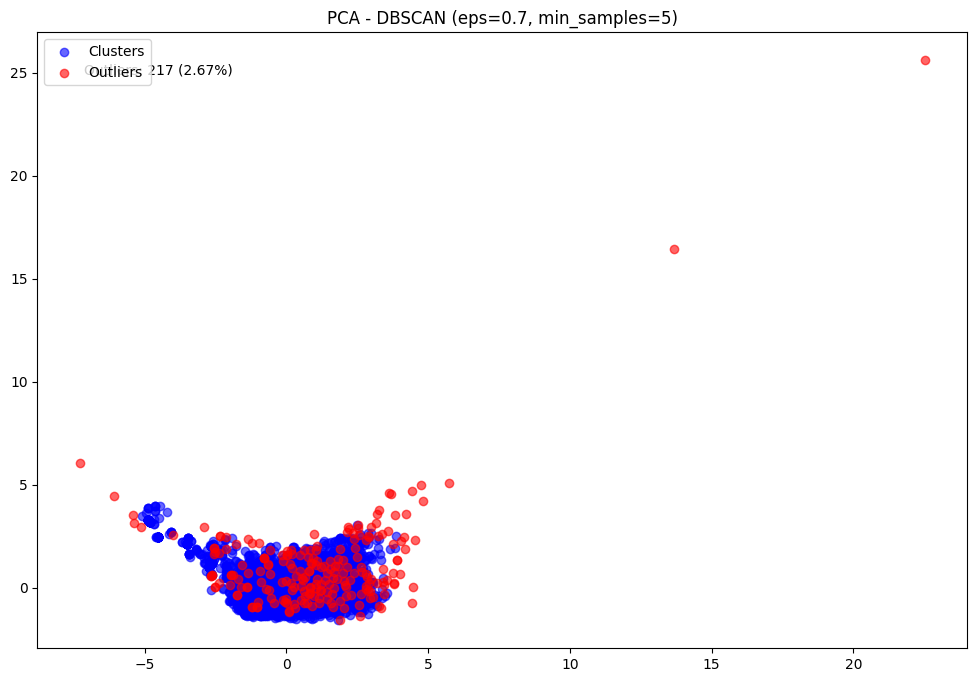

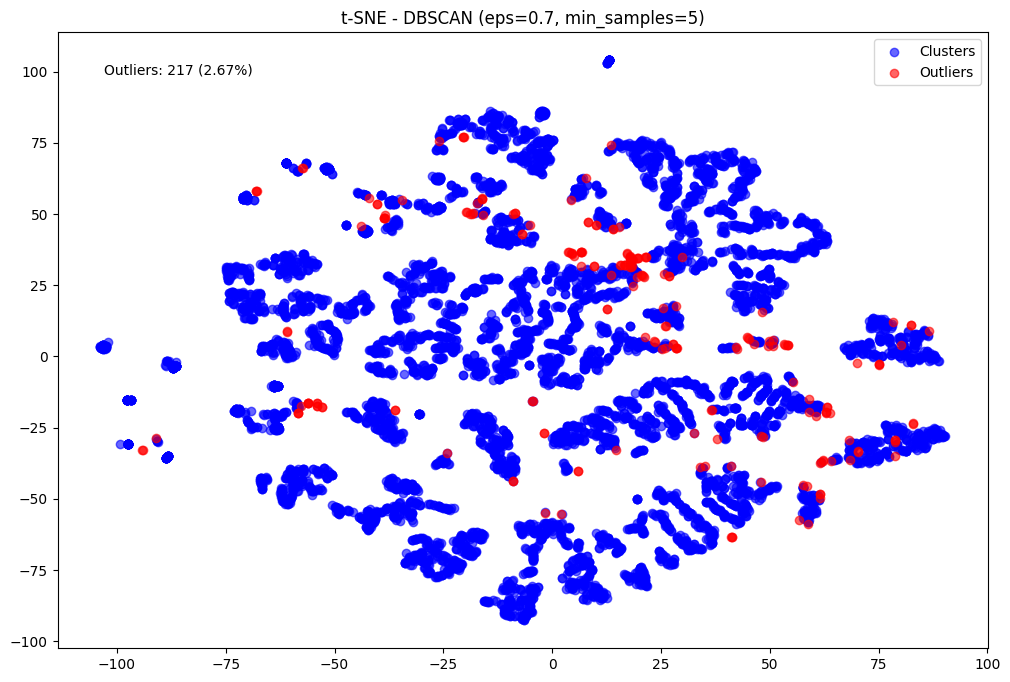

eps=0.7, min_samples=5:
  Número de clusters: 42
  Número de outliers: 217 (2.67%)



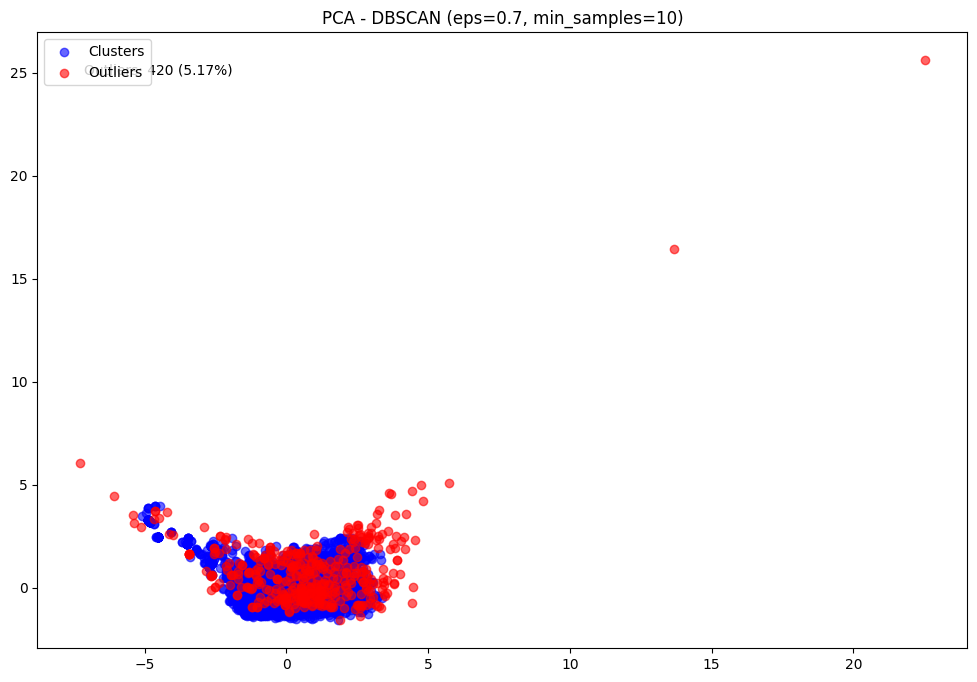

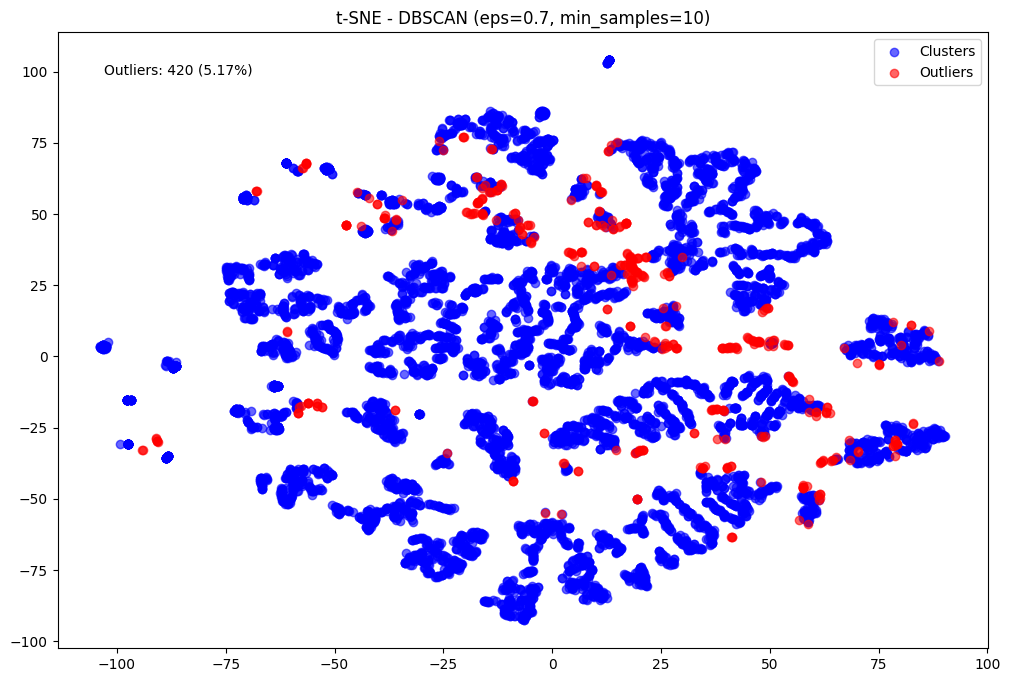

eps=0.7, min_samples=10:
  Número de clusters: 32
  Número de outliers: 420 (5.17%)



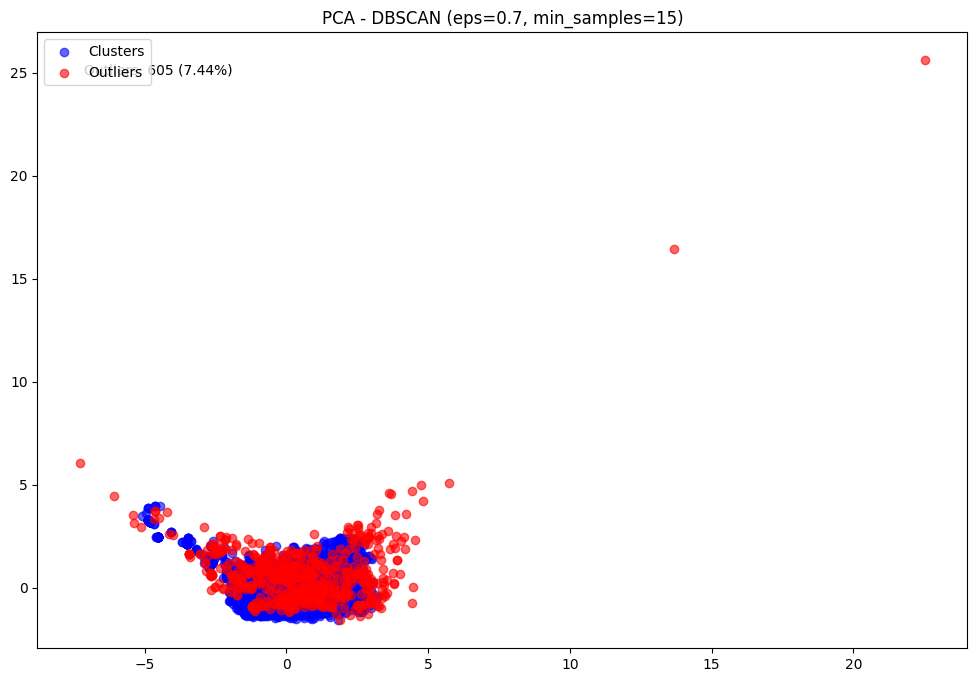

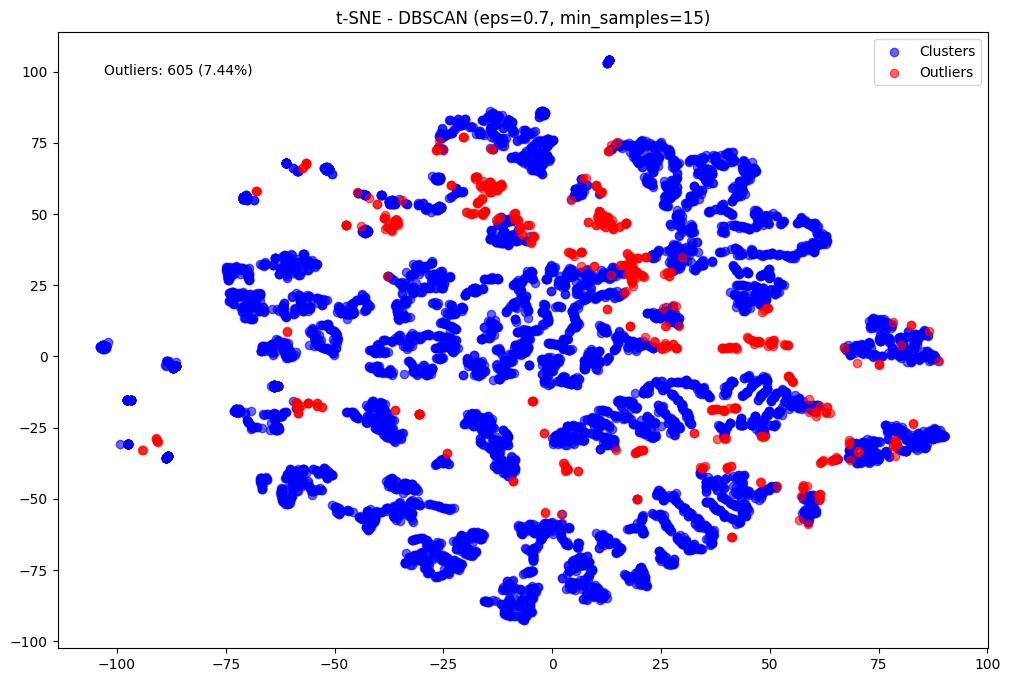

eps=0.7, min_samples=15:
  Número de clusters: 24
  Número de outliers: 605 (7.44%)



In [92]:
for eps in eps_values:
    for min_samples in min_samples_values:
        labels = apply_dbscan(X_preprocessed, eps, min_samples)
        
        # Visualizar con PCA
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_preprocessed)
        plot_clusters(X_pca, labels, f'PCA - DBSCAN (eps={eps}, min_samples={min_samples})')
        
        # Visualizar con t-SNE
        tsne = TSNE(n_components=2, random_state=42)
        X_tsne = tsne.fit_transform(X_preprocessed)
        plot_clusters(X_tsne, labels, f't-SNE - DBSCAN (eps={eps}, min_samples={min_samples})')
        
        # Imprimir estadísticas
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_outliers = list(labels).count(-1)
        print(f'eps={eps}, min_samples={min_samples}:')
        print(f'  Número de clusters: {n_clusters}')
        print(f'  Número de outliers: {n_outliers} ({n_outliers/len(labels):.2%})')
        print()

# Explicación del bucle de análisis DBSCAN

En nuestro código, creamos un bucle que hace lo siguiente:

1. **Prueba diferentes configuraciones**: 
   Probamos varias combinaciones de dos parámetros importantes para DBSCAN: 'eps' y 'min_samples'. 
   - 'eps' es como el "radio de vecindad" para cada punto.
   - 'min_samples' es cuántos vecinos necesita un punto para formar parte de un grupo.

2. **Para cada configuración, hacemos lo siguiente**:

   a. **Aplicamos DBSCAN**: 
      - Esto agrupa nuestros datos y etiqueta los puntos que no encajan en ningún grupo como outliers.

   b. **Visualizamos los resultados usando PCA**:
      - PCA nos ayuda a ver nuestros datos en 2D, mostrando las direcciones más importantes de variación.
      - Dibujamos un gráfico donde los puntos azules son grupos normales y los rojos son outliers.

   c. **Visualizamos los resultados usando t-SNE**:
      - t-SNE es otra forma de ver nuestros datos en 2D, que es buena para mostrar grupos complejos.
      - Igual que antes, azul para grupos normales, rojo para outliers.

   d. **Mostramos estadísticas**:
      - Imprimimos cuántos grupos encontramos y cuántos outliers hay.

3. **¿Qué buscamos en estos gráficos?**
   - Queremos ver si los outliers (puntos rojos) están claramente separados de los grupos normales (puntos azules).
   - Buscamos una configuración donde tengamos un número razonable de outliers, ni muy pocos ni demasiados.

4. **¿Por qué usamos tanto PCA como t-SNE?**
   - PCA nos da una vista "global" de nuestros datos.
   - t-SNE es mejor para ver estructuras locales y grupos complejos.
   - Usar ambos nos da una visión más completa de nuestros datos y outliers.

5. **Decisión final**:
   - Después de ver todos estos gráficos, podemos elegir la configuración que mejor separa los outliers de los datos normales.
   - Esta configuración nos ayudará a identificar los outliers más interesantes o importantes en nuestro conjunto de datos.

En nuestro caso la configuracion que mejor separa los puntos es un radio de 0.7 y 15 min samples, ya que logra separar bien los outliers y podemos conservar la mayor cantidad de datos importantes para su posterior analisis.

In [62]:
# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=15)  # Ajusta eps y min_samples según sea necesario
labels = dbscan.fit_predict(X_preprocessed)

In [63]:
# Agregar los resultados al DataFrame
data['cluster'] = labels

# Identificar outliers: DBSCAN asigna -1 a los outliers
outliers = data[data['cluster'] == -1]

# Mostrar los outliers
print("Número de outliers detectados:", len(outliers))
print(outliers)

Número de outliers detectados: 605
                                    name  year  selling_price  km_driven  \
6           Maruti Wagon R LXI DUO BSIII  2007          96000     175000   
7                     Maruti 800 DX BSII  2001          45000       5000   
35      Maruti Alto 800 CNG LXI Optional  2019         330000      10000   
41    Jeep Compass 1.4 Limited Plus BSIV  2019        2100000       5000   
49            Mercedes-Benz B Class B180  2014        1450000      27800   
...                                  ...   ...            ...        ...   
8045   Renault Duster RXZ 110PS AMT BSIV  2017         750000      20171   
8058             Audi A3 40 TFSI Premium  2017        1689999       8000   
8081                   Honda City ZXi AT  2005         110000     100000   
8115                       Maruti 800 AC  1997          40000     120000   
8120             Hyundai Santro Xing GLS  2008         120000     191000   

        fuel seller_type transmission         owner 

In [64]:
# Estadísticas de los outliers
print("Estadísticas de los Outliers:")
print(outliers.describe())

# Estadísticas de los datos no outliers
inliers = data[data['cluster'] != -1]
print("\nEstadísticas de los Datos No Atípicos:")
print(inliers.describe())

Estadísticas de los Outliers:
              year  selling_price     km_driven       seats  cluster
count   605.000000   6.050000e+02  6.050000e+02  605.000000    605.0
mean   2011.160331   9.527256e+05  1.053216e+05    5.499174     -1.0
std       5.956999   1.170726e+06  1.364620e+05    1.085157      0.0
min    1983.000000   2.999900e+04  1.000000e+00    4.000000     -1.0
25%    2008.000000   2.100000e+05  4.800000e+04    5.000000     -1.0
50%    2012.000000   5.000000e+05  7.901100e+04    5.000000     -1.0
75%    2016.000000   1.300000e+06  1.200000e+05    5.000000     -1.0
max    2020.000000   1.000000e+07  2.360457e+06   10.000000     -1.0

Estadísticas de los Datos No Atípicos:
              year  selling_price      km_driven        seats      cluster
count  7523.000000   7.523000e+03    7523.000000  7523.000000  7523.000000
mean   2014.016616   6.129834e+05   66964.433205     5.397847     3.962781
std       3.770238   7.639890e+05   43015.777988     0.936728     4.876153
min    19

In [68]:
# Eliminar los outliers (filas con cluster == -1)
data_cleaned = data[data['cluster'] != -1]

# Mostrar el número de filas después de eliminar los outliers
print("Número de filas después de eliminar los outliers:", len(data_cleaned))

Número de filas después de eliminar los outliers: 7523


## Division de train, val  y test

## Escalar datos 

# Model selection